# 1. Boston 주택가격 예측 (Regression)

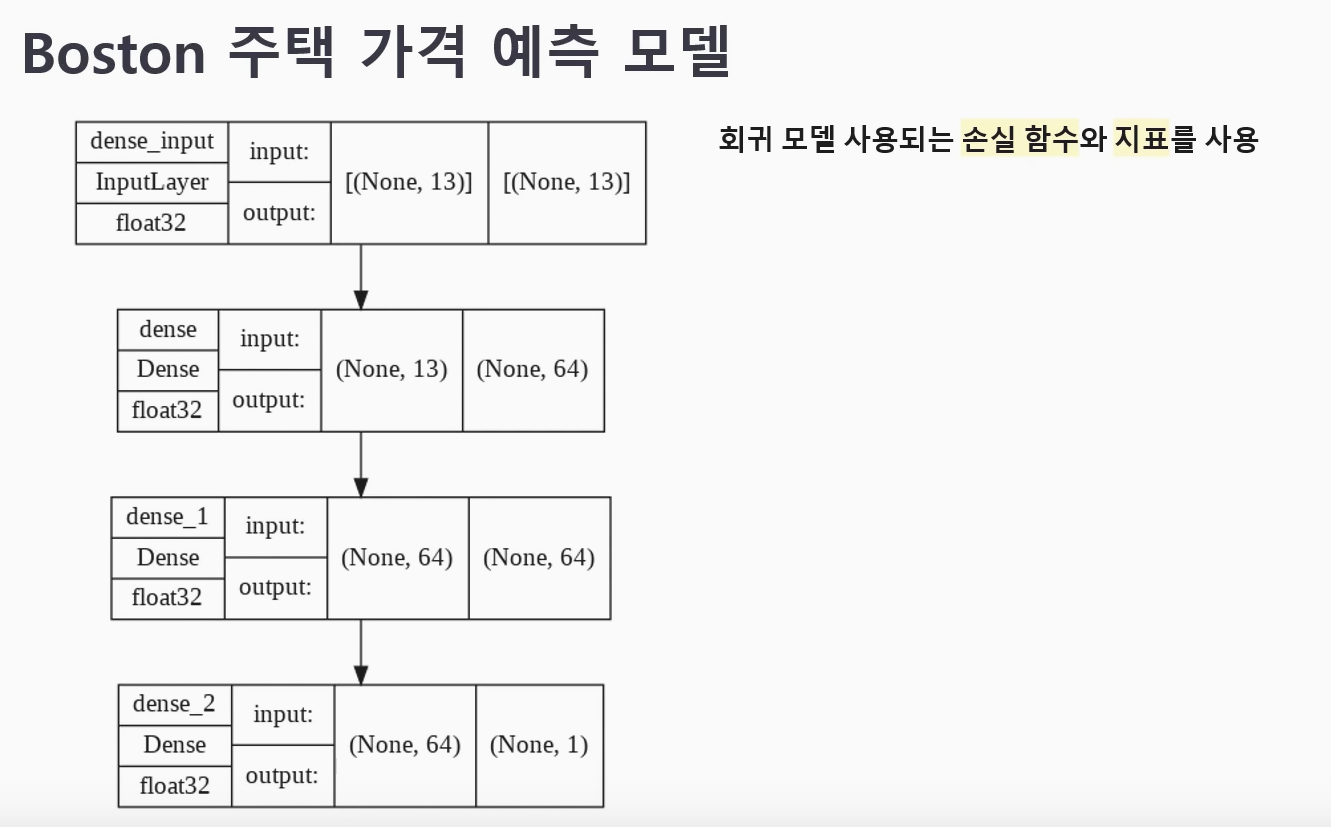
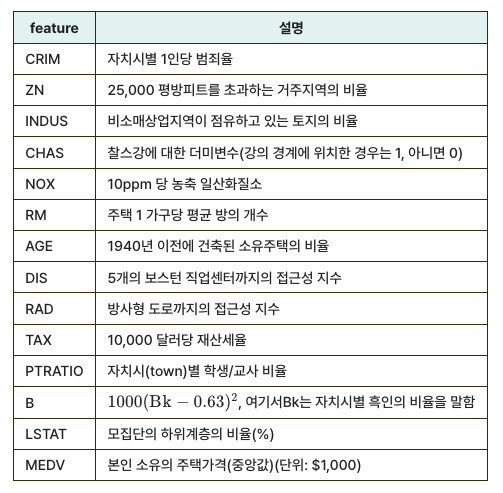

In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

## 데이터 불러오기

In [2]:
from keras.datasets import boston_housing

(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train.shape, x_test.shape

((404, 13), (102, 13))

In [3]:
!pip install pydot -qq

## 데이터 전처리

In [4]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = x_train.mean(axis=0)
x_train = x_train - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = x_train.std(axis=0)
x_train = x_train/std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
x_test = (x_test -mean) /std

## 모델 구축

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


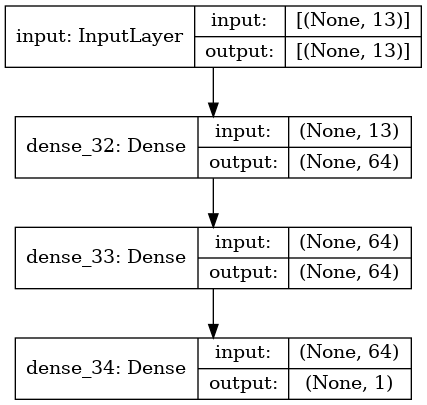

In [17]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.

input_shape = (x_train.shape[1],)

model = models.Sequential()
model.add(layers.Input(shape=input_shape, name='input'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.summary()
plot_model(model, show_shapes=True)

(참고) coursera에서 각 상황별 activation function
* Hidden Layer
 
    - Relu를 기본 활성화함수로 사용하는 걸 추천 (sigmoid 함수보다 ReLu가 계산이 더 빠르다)

 

* Output Layer

    - binary classification 문제면 -> sigmoid 함수!

    - regression 문제면 (결과가 +/ -) -> 내일 주가를 예측하려 할 때, linear 함수!

    - regression인데 y가 0이나 양수만 취할 수 있는 경우 (결과가 + | 주택 가격 예측) -> ReLu 함수!

In [18]:
model.compile(loss='mean_squared_error', optimizer= 'adam', metrics=['mae'])

## 모델 학습

In [19]:
history = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.2, verbose=1)
print(history.history.keys())

Epoch 1/50
3/3 [==============================] - 12s 75ms/step - loss: 569.3854 - mae: 22.0091 - val_loss: 630.2555 - val_mae: 23.3407
Epoch 2/50
3/3 [==============================] - 0s 11ms/step - loss: 554.8644 - mae: 21.6938 - val_loss: 615.7555 - val_mae: 23.0397
Epoch 3/50
3/3 [==============================] - 0s 10ms/step - loss: 541.0392 - mae: 21.3852 - val_loss: 601.2181 - val_mae: 22.7341
Epoch 4/50
3/3 [==============================] - 0s 10ms/step - loss: 527.2488 - mae: 21.0734 - val_loss: 586.4259 - val_mae: 22.4183
Epoch 5/50
3/3 [==============================] - 0s 10ms/step - loss: 513.1885 - mae: 20.7512 - val_loss: 571.1953 - val_mae: 22.0873
Epoch 6/50
3/3 [==============================] - 0s 10ms/step - loss: 498.6223 - mae: 20.4086 - val_loss: 555.3165 - val_mae: 21.7359
Epoch 7/50
3/3 [==============================] - 0s 10ms/step - loss: 483.2897 - mae: 20.0483 - val_loss: 538.6429 - val_mae: 21.3606
Epoch 8/50
3/3 [==============================] - 0s 1

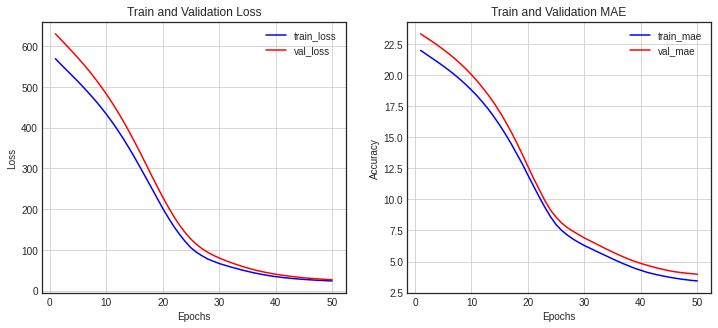

In [24]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

## 모델 평가

In [25]:
model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 6ms/step - loss: 28.5029 - mae: 4.2018


[28.502939224243164, 4.2018351554870605]

---

# 2. Reuters Deeplearning Model
- 다중 분류 문제
- BatchNormalization과 Dropout, ModelCheckpoint와 EarlyStopping 콜백 함수 적용

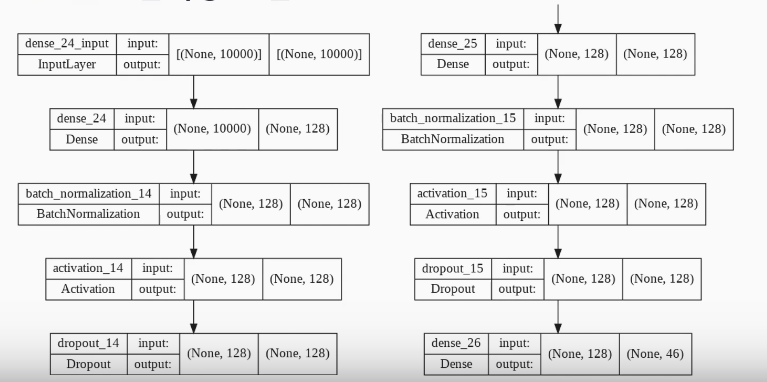

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, callbacks, utils
from keras.datasets import reuters

## 데이터 로드

In [56]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = reuters.load_data(num_words=10000)
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, 
                                                  test_size=0.25,
                                                  random_state=42)

x_train.shape, y_train.shape
 
# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(x_train))
print(len(x_val))
print(len(x_test))
print(len(set(y_train)))

6736
2246
2246
46


## 데이터 전처리
- 원핫인코딩 (text -> vectorization)
- 뉴스 주제인 label도 원핫인코딩

In [57]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(x_train)
x_val = one_hot_encoding(x_val)
x_test = one_hot_encoding(x_test)


# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(y_train) 
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

## 모델 구성 및 컴파일

In [62]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(10000,), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 128)               1280128   
_________________________________________________________________
batch_normalization_6 (Batch (None, 128)               512       
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden (Dense)               (None, 128)               16512     
_________________________________________________________________
batch_normalization_7 (Batch (None, 128)               512       
_________________________________________________________________
activation_7 (Activation)    (None, 128)             

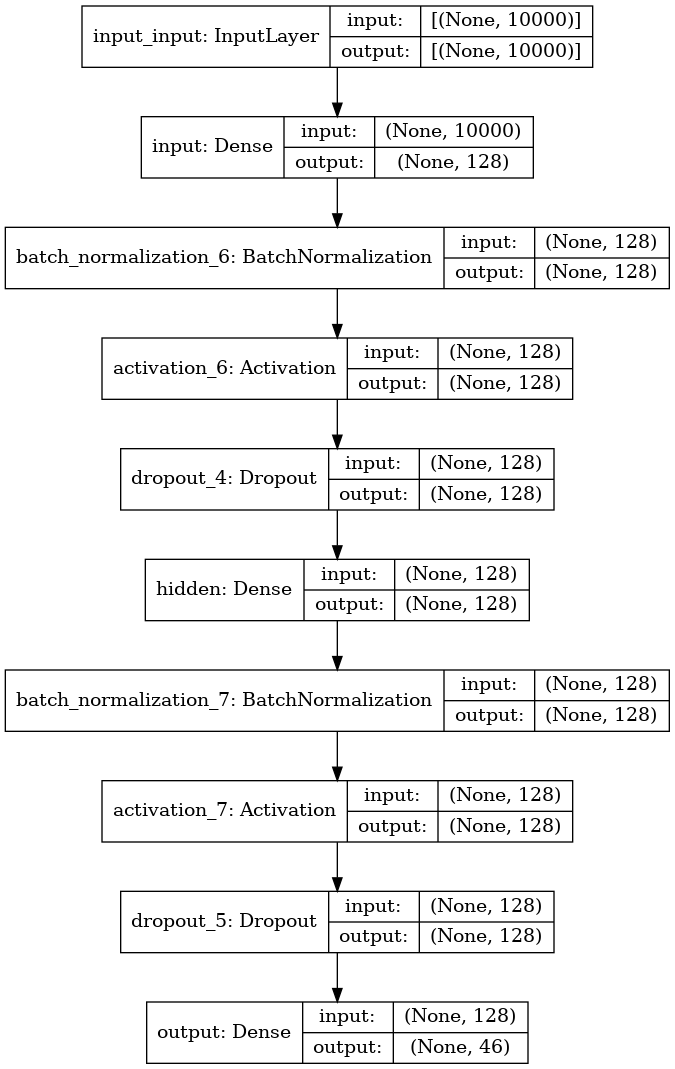

In [63]:
plot_model(model, show_shapes=True)

## 모델 학습 (early stopping, model checkpoint)

In [64]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('reuters.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=25, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
211/211 [==============================] - 2s 7ms/step - loss: 1.5342 - accuracy: 0.6520 - val_loss: 1.3674 - val_accuracy: 0.7462
Epoch 2/50
211/211 [==============================] - 1s 5ms/step - loss: 0.8793 - accuracy: 0.7931 - val_loss: 0.9982 - val_accuracy: 0.7854
Epoch 3/50
211/211 [==============================] - 1s 5ms/step - loss: 0.6045 - accuracy: 0.8585 - val_loss: 0.9955 - val_accuracy: 0.8050
Epoch 4/50
211/211 [==============================] - 1s 5ms/step - loss: 0.4580 - accuracy: 0.8912 - val_loss: 1.0186 - val_accuracy: 0.8130
Epoch 5/50
211/211 [==============================] - 1s 5ms/step - loss: 0.3664 - accuracy: 0.9132 - val_loss: 1.1075 - val_accuracy: 0.8085
Epoch 6/50
211/211 [==============================] - 1s 5ms/step - loss: 0.3122 - accuracy: 0.9265 - val_loss: 1.1366 - val_accuracy: 0.8108
Epoch 7/50
211/211 [==============================] - 1s 5ms/step - loss: 0.2814 - accuracy: 0.9341 - val_loss: 1.1630 - val_accuracy: 0.8077
Epoch 

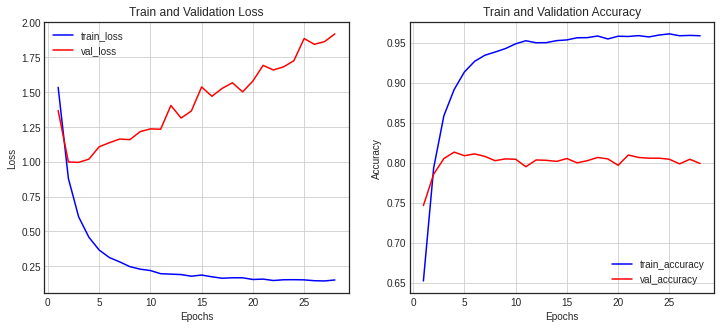

In [65]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [66]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0402 - accuracy: 0.7765


[1.0402108430862427, 0.7764915227890015]

---

# 3. CIFAR10 딥러닝 모델
- 분류 갯수가 10개인 컬러이미지로 구성된 데이터셋
- 32x32 픽셀의 60,000개 컬러이미지 포함 

## Data load, preprocessing
- color image이기 때문에, 32*32*3 (채널 정보까지 포함) 으로 reshape 해줘야한다
- 0~255 사이의 값을 0, 1사이 값으로 변환해준다

In [84]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

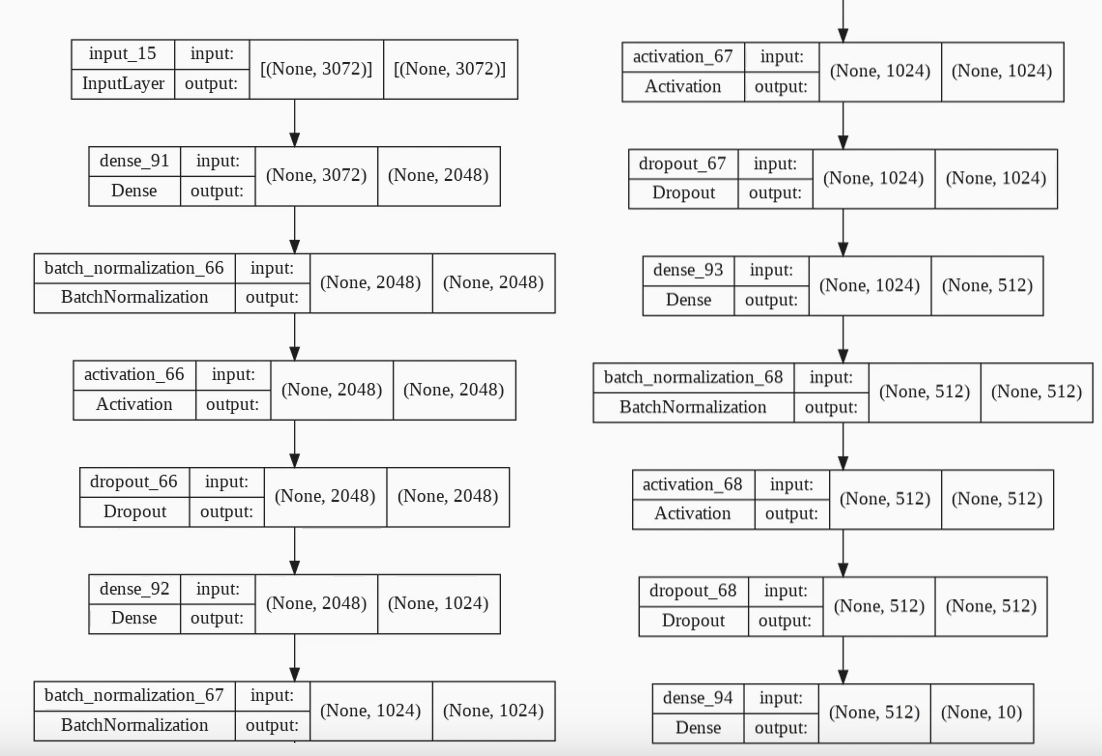

In [85]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, 
                                                test_size=0.2, random_state=42)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [86]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

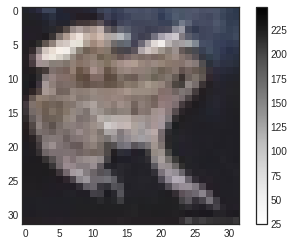

In [87]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [88]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape((40000, 3072))
x_val = x_val.reshape((10000, 3072))
x_test = x_test.reshape((10000, 3072))

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [89]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 모델 구성, 컴파일

In [96]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

model = models.Sequential()

model.add(layers.Input(shape=(3072,), name='input'))

model.add(layers.Dense(2048, name='hidden1'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(1024, name='hidden2'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(512, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(10, activation='softmax', name='output'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

* 여기서 sparse_categorical 로 선택해줘서 오류를 해결할 수 있었다. 별개의 10개의 각각의 타깃 데이터를 정수 형태로 받아들일 수 있게 된다.

In [97]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_17 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_17 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 2048)              0         
_________________________________________________________________
hidden2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_18 (Batc (None, 1024)              4096      
_________________________________________________________________
activation_18 (Activation)   (None, 1024)            

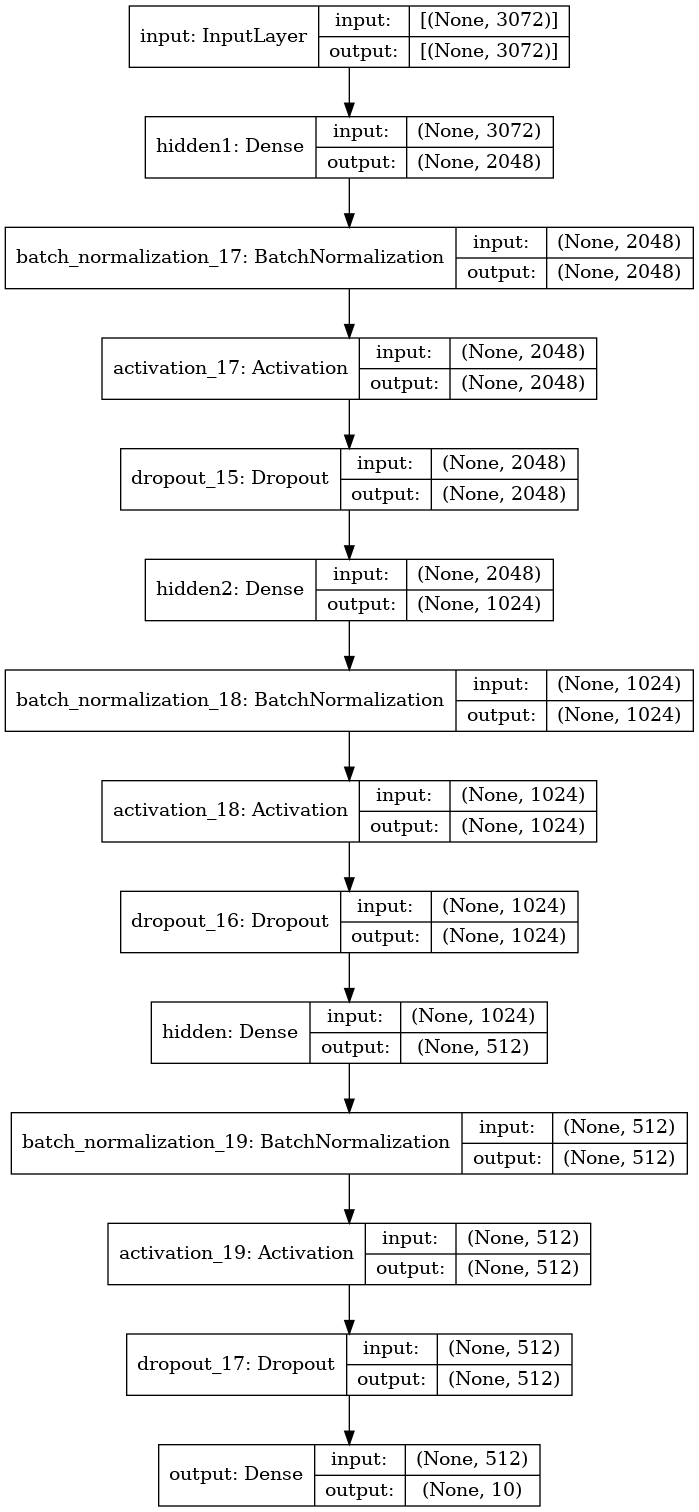

In [98]:
utils.plot_model(model, show_shapes=True)

In [99]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10.h5', save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=25, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
1250/1250 [==============================] - 11s 7ms/step - loss: 1.7992 - accuracy: 0.3679 - val_loss: 1.7378 - val_accuracy: 0.3798
Epoch 2/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.5421 - accuracy: 0.4530 - val_loss: 1.6192 - val_accuracy: 0.4152
Epoch 3/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.4324 - accuracy: 0.4918 - val_loss: 1.6890 - val_accuracy: 0.4436
Epoch 4/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3631 - accuracy: 0.5193 - val_loss: 1.5318 - val_accuracy: 0.4799
Epoch 5/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.3074 - accuracy: 0.5385 - val_loss: 1.8482 - val_accuracy: 0.3872
Epoch 6/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2529 - accuracy: 0.5608 - val_loss: 1.5293 - val_accuracy: 0.4800
Epoch 7/50
1250/1250 [==============================] - 8s 7ms/step - loss: 1.2057 - accuracy: 0.5758 - val_loss: 1.7592 - val_accuracy

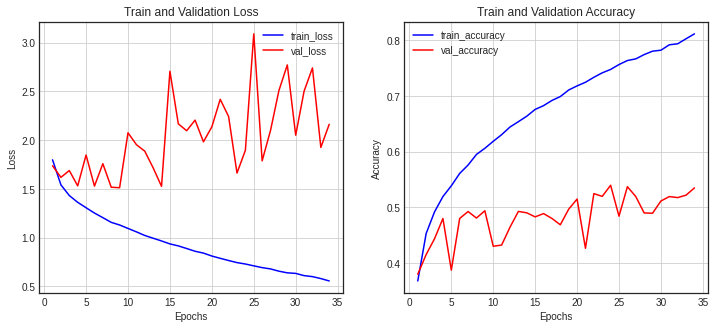

In [100]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

* 사실상 accuracy가 50%밖에 안되고, 성능이 안좋아서 못 쓴다. 우리는 지금 Dense layer만  썼기 때문에 그런데, CNN 계열의 이미지 관련 아키텍처를 구축해야 더 정확한 결과가 나올 수 있다.

In [101]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5065 - accuracy: 0.4941


[1.5065147876739502, 0.49410000443458557]

## 사실 지금까지 배운 Dense Layer만 활용해서는 이번 프로젝트에서 높은 accuracy를 얻기는 힘듭니다. 
## 이미지 데이터를 다루기 위해서는 이미지에 적합한 CNN(Convolution Neural Network) 계열의 모델을 사용해야 합니다. 
## CNN에 대한 내용은 Computer Vision 과정을 통해 더 배울 수 있습니다.